In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DBSCAN import evaluate

# Data

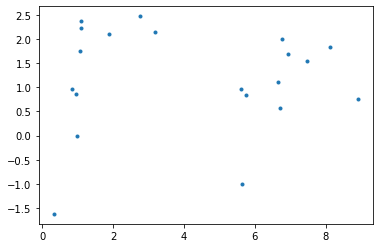

In [2]:
Npoints = 20
n = int(Npoints/2)

x = np.random.normal(1,1,n)
y = np.random.normal(1,1,n)
labels_true = np.zeros(shape=(n,))
x = np.concatenate([x,np.random.normal(7,1,n)])
y = np.concatenate([y,np.random.normal(1,1,n)])
labels_true = np.concatenate([labels_true, np.ones(shape=(n,))])

plt.plot(x,y,'.')

X = []
for i in range(len(x)):
    X.append([x[i],y[i]])
X = np.array(X)

# hdbscan


In [3]:
xydists = np.array([np.array([x for _ in range(len(X))]) - X for x in X])

In [4]:
xydists = np.array([np.array([x for _ in range(len(X))]) - X for x in X])
dists = np.sqrt(xydists[:,:,0]**2 + xydists[:,:,1]**2)
dists[np.triu_indices(Npoints)] = np.max(dists)

In [41]:
dists[np.argpartition(dists, np.arange(20))]

array([[[8.9049378 , 8.9049378 , 8.9049378 , ..., 8.9049378 ,
         8.9049378 , 8.9049378 ],
        [3.04800767, 8.9049378 , 8.9049378 , ..., 8.9049378 ,
         8.9049378 , 8.9049378 ],
        [2.38441473, 1.66362527, 8.9049378 , ..., 8.9049378 ,
         8.9049378 , 8.9049378 ],
        ...,
        [6.20656954, 4.26939165, 5.89775861, ..., 8.9049378 ,
         8.9049378 , 8.9049378 ],
        [4.85400015, 3.42302454, 4.91466572, ..., 1.46416771,
         8.9049378 , 8.9049378 ],
        [5.77371809, 4.39661996, 5.90910089, ..., 1.12904113,
         0.99599672, 8.9049378 ]],

       [[8.9049378 , 8.9049378 , 8.9049378 , ..., 8.9049378 ,
         8.9049378 , 8.9049378 ],
        [3.04800767, 8.9049378 , 8.9049378 , ..., 8.9049378 ,
         8.9049378 , 8.9049378 ],
        [2.38441473, 1.66362527, 8.9049378 , ..., 8.9049378 ,
         8.9049378 , 8.9049378 ],
        ...,
        [6.20656954, 4.26939165, 5.89775861, ..., 8.9049378 ,
         8.9049378 , 8.9049378 ],
        [4.8

In [5]:
idx = np.argsort(dists)

In [33]:
np.take_along_axis(dists, idx, axis=1)

array([[8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ],
       [3.04800767, 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ],
       [1.66362527, 2.38441473, 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ],
       [0.15532654, 1.66606464, 2.23063774, 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 , 8.9049378 ,
        8.9049378 , 8.9049378 , 8.9049378 , 8

In [113]:
def HDBSCAN(X, threshold):
    xydists = np.array([np.array([x for _ in range(len(X))]) - X for x in X])
    dists = np.sqrt(xydists[:,:,0]**2 + xydists[:,:,1]**2)
    max_dist = np.max(dists)
    dists[np.triu_indices(Npoints)] = max_dist

    mindist = [0]
    mindistPts = []

    plt.plot(X[:,0],X[:,1],'o')

    i = 0
    while mindist[-1] < threshold and i<dists.size:
        minidx = np.argmin(dists)
        row = minidx // 20
        col = minidx % 20
        mindist.append(dists[row,col])
        mindistPts.append([row, col])
        dists[row,col] = max_dist
        plt.plot(X[row,0],X[row,1],'or')
        plt.plot(X[col,0],X[col,1],'or')
        plt.plot([X[row,0],X[col,0]],[X[row,1],X[col,1]], 'b')
        i += 1
    plt.show()

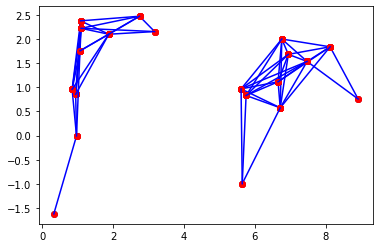

In [117]:
HDBSCAN(X, 2)

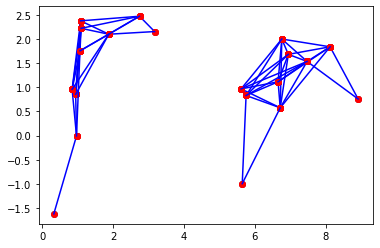

In [89]:
xydists = np.array([np.array([x for _ in range(len(X))]) - X for x in X])
dists = np.sqrt(xydists[:,:,0]**2 + xydists[:,:,1]**2)
max_dist = np.max(dists)
dists[np.triu_indices(Npoints)] = max_dist


mindist = []
mindistPts = []

plt.plot(X[:,0],X[:,1],'o')

for i in range(55):
    minidx = np.argmin(dists)
    row = minidx // 20
    col = minidx % 20
    mindist.append(dists[row,col])
    mindistPts.append([row, col])
    dists[row,col] = max_dist
    plt.plot(X[row,0],X[row,1],'or')
    plt.plot(X[col,0],X[col,1],'or')
    plt.plot([X[row,0],X[col,0]],[X[row,1],X[col,1]], 'b')
plt.show()

In [62]:
mindist

[0.1435689575430088,
 0.15532653689873924,
 0.19635289179977455,
 0.36658321387938686,
 0.46744688461699485,
 0.5307354577967827,
 0.5414500385989995,
 0.5492020217627831,
 0.6213624792718169,
 0.6371547599192794]

In [63]:
mindistPts

[[2, 1],
 [7, 5],
 [12, 10],
 [16, 15],
 [5, 4],
 [9, 8],
 [14, 13],
 [17, 16],
 [7, 4],
 [16, 14]]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

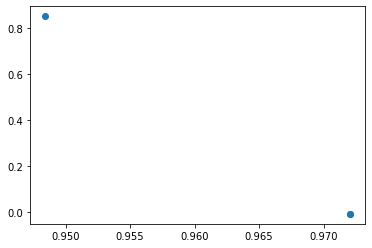

In [64]:
plt.plot(X[closestidxs,0],X[closestidxs,1],'o')
plt.plot(X[curr][:,0],X[curr][:,1],'o')

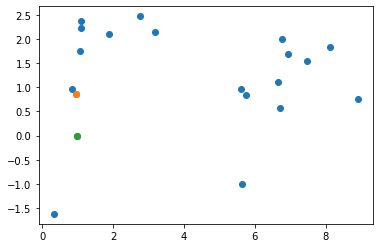

In [12]:
i = 0
point = X[i]
dimdists = X - point
dimdists[0] = 10
dist = np.sqrt(np.sum(dimdists ** 2, axis=1))
closesnidx = np.argsort(dist)[0]

plt.plot(X[:,0],X[:,1],'o')
plt.plot(X[closesnidx,0],X[closesnidx,1],'o')
plt.plot(point[0],point[1],'o')

In [13]:
dimdists ** 2

array([[1.00000000e+02, 1.00000000e+02],
       [3.15629968e+00, 6.13405105e+00],
       [1.33847838e-02, 5.67204883e+00],
       [1.67363833e-02, 4.95900835e+00],
       [8.28266171e-01, 4.42979482e+00],
       [9.57444007e-03, 3.09936072e+00],
       [4.10389839e-01, 2.60259691e+00],
       [1.53889363e-02, 9.28122049e-01],
       [4.84998368e+00, 4.66433764e+00],
       [5.56228661e-04, 7.41032015e-01],
       [6.30631366e+01, 5.83204815e-01],
       [3.35044455e+01, 4.02062968e+00],
       [2.15289081e+01, 9.47104053e-01],
       [4.22716893e+01, 2.37489066e+00],
       [2.18356088e+01, 9.76393514e-01],
       [3.22998493e+01, 1.25557075e+00],
       [5.11188407e+01, 3.40180378e+00],
       [3.56713682e+01, 2.85013725e+00],
       [2.28608610e+01, 7.00456486e-01],
       [3.29964964e+01, 3.39324088e-01]])

In [14]:
dist[np.argsort(dist)]


array([ 0.86115518,  0.97134494,  1.73579571,  1.76321728,  2.23063774,
        2.29304623,  2.38441473,  3.04800767,  3.08452935,  4.74088728,
        4.77619119,  4.85400015,  5.77371809,  5.79270404,  6.12577139,
        6.20656954,  6.68180963,  7.38380962,  7.97786572, 14.14213562])

In [15]:
def findNearestPoint(point, X):
    dimdists = X - point
    dist = np.sqrt(np.sum(dimdists ** 2, axis=1))
    closesnidx = np.argsort(dist)[0]
    return X[closesnidx]

In [16]:
X[closesnidx]

array([0.9484302 , 0.85242556])

In [17]:
import operator

def smallest_difference(points):
    sorted_points = sorted(points)
    return min(zip(sorted_points, sorted_points[1:]), key=lambda x: abs(x[1] - x[0]))

In [18]:
smallest_difference(X)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Text(0.5, 1.0, '[0.0609620568165985, -0.5380072229325067]')

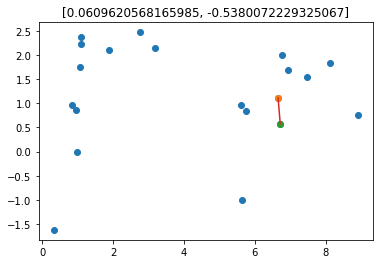

In [19]:
i = 0
point = X[i]
dimdists = X - point
dist = np.sqrt(np.sum(dimdists ** 2, axis=1))
closesnidx = np.argsort(dist)
X = X[closesnidx]

i = 13
point = X[i]
X_closesnidx = findNearestPoint(point, X[X[:,0]!=point[0]])
plt.plot(X[:,0],X[:,1],'o')
plt.plot(X_closesnidx[0],X_closesnidx[1],'o')
plt.plot(point[0],point[1],'o')
plt.plot([point[0],X_closesnidx[0]],[point[1],X_closesnidx[1]])
plt.title([point[0]-X_closesnidx[0], point[1]-X_closesnidx[1]])

In [205]:
X_closesnidx

array([0.79802884, 0.84173967])

In [206]:
point

array([0.79802884, 0.84173967])

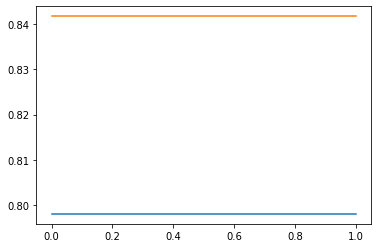

In [199]:
plt.plot(findNearestPoint(point, X))

In [168]:
dist[np.argsort(dist)]

array([ 0.38368352,  0.762535  ,  0.8068514 ,  0.84575307,  1.33621335,
        1.41774482,  1.45396908,  1.51923042,  1.82583328,  4.60208238,
        4.78611465,  5.70212625,  6.12243219,  6.1372891 ,  6.86177208,
        7.25124752,  7.5298797 ,  7.57497614,  7.71067909, 14.14213562])

In [152]:
point

array([0.79802884, 0.84173967])

In [153]:
X - point

array([[ 0.        ,  0.        ],
       [-0.15427884, -0.35129913],
       [ 1.32162449,  0.1969133 ],
       [-0.20137342,  1.40337063],
       [ 0.73768062, -0.19309823],
       [ 1.68647391,  0.69962341],
       [ 0.82011266,  0.20667241],
       [-1.04477764,  1.10295092],
       [ 0.78332104,  0.19343558],
       [-0.04398234, -1.4533037 ],
       [ 7.29036327,  1.88406256],
       [ 6.12145165,  0.10956992],
       [ 7.24262262, -0.35356503],
       [ 7.54875953,  0.62967698],
       [ 7.70433897,  0.31262287],
       [ 4.69645282, -0.92207614],
       [ 6.1074222 , -0.60474094],
       [ 4.59736206, -0.20838486],
       [ 5.6211141 , -0.95776825],
       [ 6.75047609,  1.23084873]])

In [298]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points
import geopandas

df = gpd.GeoDataFrame(geopandas.GeoSeries(geopandas.points_from_xy(X[:,0], X[:,1])), columns=['geometry'])
df.insert(1, 'nearest_geometry', None)

for index, row in df.iterrows():
    point = row.geometry
    multipoint = df.drop(index, axis=0).geometry.unary_union
    queried_geom, nearest_geom = nearest_points(point, multipoint)
    df.loc[index, 'nearest_geometry'] = nearest_geom

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)
c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)
c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)
c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\managers.py:304: S

In [ ]:
nearest_geometry

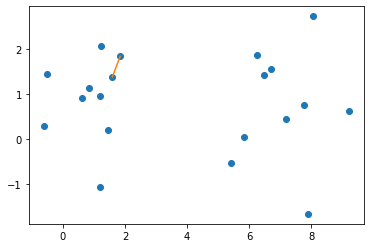

In [311]:
plt.plot(X[:,0],X[:,1],'o')
plt.plot([df.iloc[0].geometry.x, df.iloc[0].nearest_geometry.x], [df.iloc[0].geometry.y, df.iloc[0].nearest_geometry.y])

In [312]:
df

,geometry,nearest_geometry
0,POINT (1.59341 1.38390),POINT (1.8459143550053172 1.8414792473825452)
1,POINT (1.84591 1.84148),POINT (1.5934114341326393 1.3839019168355455)
2,POINT (1.18444 0.95203),POINT (0.8553494148266843 1.126750301748387)
3,POINT (1.23186 2.07263),POINT (1.8459143550053172 1.8414792473825452)
4,POINT (0.85535 1.12675),POINT (0.6165531879231483 0.9177735704803891)
5,POINT (0.61655 0.91777),POINT (0.8553494148266843 1.126750301748387)
6,POINT (1.45125 0.21228),POINT (1.1844365569089705 0.9520349622028953)
7,POINT (-0.49814 1.44483),POINT (-0.6044926880613066 0.2909389601797096)
8,POINT (-0.60449 0.29094),POINT (-0.498135671420973 1.4448255781520043)
9,POINT (1.18138 -1.06349),POINT (1.4512538176039311 0.2122842580036954)


In [26]:
import geopandas
from shapely.geometry import Point, box
from shapely.ops import nearest_points

pts = geopandas.GeoSeries(geopandas.points_from_xy(X[:,0], X[:,1]))
pts.head()

0     POINT (2.67840 1.70324)
1     POINT (1.63128 2.47102)
2    POINT (-0.10894 2.56577)
3     POINT (0.05097 1.71517)
4     POINT (1.80004 0.78007)
dtype: geometry

In [39]:
pts[0].coords[0] - pts[1].coords[0]

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [40]:
nearest_points(pts[0], pts)

AttributeError: 'GeoSeries' object has no attribute '_geom'

# DBSCAN

In [3]:
eps = 0.8
minPts = 20

# Scikit Benchmark

Estimated number of clusters: 2
Estimated number of noise points: 15
Homogeneity: 0.978
Completeness: 0.926
V-measure: 0.951
Adjusted Rand Index: 0.979
Adjusted Mutual Information: 0.951
Silhouette Coefficient: 0.640


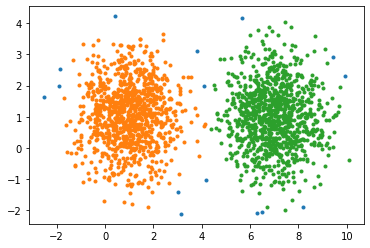

In [4]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=eps, min_samples=minPts).fit(X)
labels = clustering.labels_

evaluate(labels, labels_true, X)

# Our implementation

Estimated number of clusters: 2
Estimated number of noise points: 17
Homogeneity: 0.977
Completeness: 0.920
V-measure: 0.948
Adjusted Rand Index: 0.977
Adjusted Mutual Information: 0.947
Silhouette Coefficient: 0.643


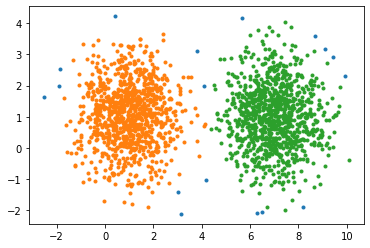

In [5]:
from DBSCAN import DBSCAN, numpyToPoints

Points = numpyToPoints(X)

clustering = DBSCAN(eps, minPts)
clustering.fit(Points)
labels = clustering.labels

evaluate(labels, labels_true, X)